In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('amaz_stock_data.csv')

In [3]:
# data preparation

In [5]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Brand_Name',
       'Ticker', 'Industry_Tag', 'Country', 'Dividends', 'Stock Splits',
       'Capital Gains'],
      dtype='object')

In [6]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [13]:
df.isnull().sum()


date                0
open                0
high                0
low                 0
close               0
volume              0
brand_name          0
ticker              0
industry_tag        0
country             0
dividends           0
stock_splits        0
capital_gains    1000
dtype: int64

In [15]:
df = df.drop('capital_gains', axis=1)

In [17]:
df.isna().any()

date            False
open            False
high            False
low             False
close           False
volume          False
brand_name      False
ticker          False
industry_tag    False
country         False
dividends       False
stock_splits    False
dtype: bool

In [16]:
df.dtypes

date             object
open            float64
high            float64
low             float64
close           float64
volume            int64
brand_name       object
ticker           object
industry_tag     object
country          object
dividends         int64
stock_splits      int64
dtype: object

In [19]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['date', 'brand_name', 'ticker', 'industry_tag', 'country']

In [20]:
for col in strings:
       df[col] = df[col].str.lower().str.replace(' ','_')

In [21]:
df

,date,open,high,low,close,volume,brand_name,ticker,industry_tag,country,dividends,stock_splits
0,2025-07-03_00:00:00-04:00,221.705002,224.009995,221.360001,223.410004,29295154,amazon,amzn,e-commerce,usa,0,0
1,2025-07-03_00:00:00-04:00,221.820007,224.009995,221.360001,223.410004,29632400,amazon,amzn,e-commerce,usa,0,0
2,2025-07-02_00:00:00-04:00,219.729996,221.600006,219.059998,219.919998,30840800,amazon,amzn,e-commerce,usa,0,0
3,2025-07-01_00:00:00-04:00,219.500000,221.880005,217.929993,220.460007,39200000,amazon,amzn,e-commerce,usa,0,0
4,2025-06-30_00:00:00-04:00,223.520004,223.820007,219.119995,219.389999,58798200,amazon,amzn,e-commerce,usa,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,2021-10-05_00:00:00-04:00,160.225006,163.036499,160.123001,161.050003,65384000,amazon,amzn,e-commerce,usa,0,0
996,2021-10-04_00:00:00-04:00,163.969498,163.999496,158.812500,159.488998,90462000,amazon,amzn,e-commerce,usa,0,0
997,2021-10-01_00:00:00-04:00,164.450501,165.458496,162.796997,164.162994,56712000,amazon,amzn,e-commerce,usa,0,0
998,2021-09-30_00:00:00-04:00,165.800003,166.392502,163.699493,164.251999,56848000,amazon,amzn,e-commerce,usa,0,0


In [22]:
print(df.columns)


Index(['date', 'open', 'high', 'low', 'close', 'volume', 'brand_name',
       'ticker', 'industry_tag', 'country', 'dividends', 'stock_splits'],
      dtype='object')


In [23]:
df['date'] = df['date'].str.replace('_', ' ', regex=False)
df['date'] = pd.to_datetime(df['date'], errors='coerce', utc=True)




In [24]:
df.head()

,date,open,high,low,close,volume,brand_name,ticker,industry_tag,country,dividends,stock_splits
0,2025-07-03 04:00:00+00:00,221.705002,224.009995,221.360001,223.410004,29295154,amazon,amzn,e-commerce,usa,0,0
1,2025-07-03 04:00:00+00:00,221.820007,224.009995,221.360001,223.410004,29632400,amazon,amzn,e-commerce,usa,0,0
2,2025-07-02 04:00:00+00:00,219.729996,221.600006,219.059998,219.919998,30840800,amazon,amzn,e-commerce,usa,0,0
3,2025-07-01 04:00:00+00:00,219.500000,221.880005,217.929993,220.460007,39200000,amazon,amzn,e-commerce,usa,0,0
4,2025-06-30 04:00:00+00:00,223.520004,223.820007,219.119995,219.389999,58798200,amazon,amzn,e-commerce,usa,0,0


In [25]:
print("Shape of dataset:", df.shape)
print("\nMissing values per column:")
print(df.isna().sum())

print("\nSummary statistics:")
print(df.describe())

Shape of dataset: (1000, 12)

Missing values per column:
date            0
open            0
high            0
low             0
close           0
volume          0
brand_name      0
ticker          0
industry_tag    0
country         0
dividends       0
stock_splits    0
dtype: int64

Summary statistics:
              open         high          low        close        volume  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1.000000e+03   
mean    157.041936   159.003282   154.935264   157.025742  5.651587e+07   
std      39.648865    39.793008    39.379473    39.626914  2.761145e+07   
min      82.800003    83.480003    81.430000    81.820000  1.433375e+07   
25%     125.240000   127.332500   123.947502   125.712750  3.876210e+07   
50%     159.222496   161.761246   157.707252   160.254501  5.051394e+07   
75%     186.464996   187.960003   183.807495   186.357506  6.652998e+07   
max     239.020004   242.520004   238.039993   242.059998  2.726620e+08   

       dividends 

In [28]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

date
<DatetimeArray>
['2025-07-03 04:00:00+00:00', '2025-07-02 04:00:00+00:00',
 '2025-07-01 04:00:00+00:00', '2025-06-30 04:00:00+00:00',
 '2025-06-27 04:00:00+00:00']
Length: 5, dtype: datetime64[ns, UTC]
938

open
[221.7050018 221.8200073 219.7299957 219.5       223.5200043]
952

high
[224.0099945 221.6000061 221.8800049 223.8200073 223.3000031]
932

low
[221.3600006 219.0599976 217.9299927 219.1199951 216.7400055]
938

close
[223.4100037 219.9199982 220.4600067 219.3899994 223.3000031]
909

volume
[29295154 29632400 30840800 39200000 58798200]
999

brand_name
['amazon']
1

ticker
['amzn']
1

industry_tag
['e-commerce']
1

country
['usa']
1

dividends
[0]
1

stock_splits
[ 0 20]
2



<Axes: xlabel='close', ylabel='Count'>

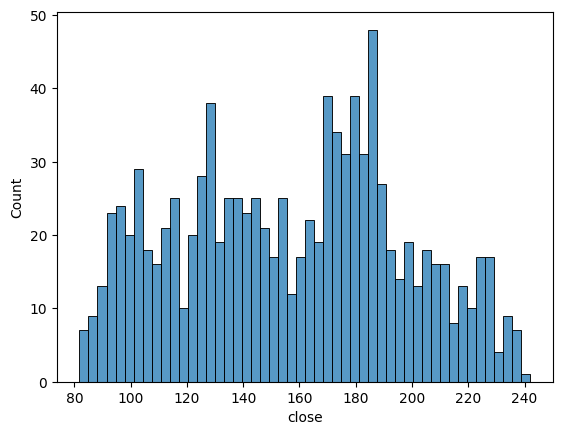

In [33]:
sns.histplot(df.close, bins=50)

In [35]:
# Create a new target column (target) that represents the next day’s close.
df['target'] = df['close'].shift(-1)


In [37]:
df.head(10)

,date,open,high,low,close,volume,brand_name,ticker,industry_tag,country,dividends,stock_splits,target
0,2025-07-03 04:00:00+00:00,221.705002,224.009995,221.360001,223.410004,29295154,amazon,amzn,e-commerce,usa,0,0,223.410004
1,2025-07-03 04:00:00+00:00,221.820007,224.009995,221.360001,223.410004,29632400,amazon,amzn,e-commerce,usa,0,0,219.919998
2,2025-07-02 04:00:00+00:00,219.729996,221.600006,219.059998,219.919998,30840800,amazon,amzn,e-commerce,usa,0,0,220.460007
3,2025-07-01 04:00:00+00:00,219.500000,221.880005,217.929993,220.460007,39200000,amazon,amzn,e-commerce,usa,0,0,219.389999
4,2025-06-30 04:00:00+00:00,223.520004,223.820007,219.119995,219.389999,58798200,amazon,amzn,e-commerce,usa,0,0,223.300003
5,2025-06-27 04:00:00+00:00,219.921997,223.300003,216.740005,223.300003,106482541,amazon,amzn,e-commerce,usa,0,0,223.300003
6,2025-06-27 04:00:00+00:00,219.919998,223.300003,216.740005,223.300003,119122800,amazon,amzn,e-commerce,usa,0,0,217.119995
7,2025-06-26 04:00:00+00:00,213.119995,218.039993,212.009995,217.119995,50387600,amazon,amzn,e-commerce,usa,0,0,211.990005
8,2025-06-25 04:00:00+00:00,214.619995,216.029999,211.110001,211.990005,31690000,amazon,amzn,e-commerce,usa,0,0,212.770004
9,2025-06-24 04:00:00+00:00,212.139999,214.339996,211.050003,212.770004,38338200,amazon,amzn,e-commerce,usa,0,0,208.470001
